In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Paths
pjoin = lambda p1, p2 : os.path.join(p1, p2)
OUT_PATH = 'output'

In [3]:
# Data sample
df = pd.read_csv('data/mytest.csv', skipinitialspace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                5479 non-null   object 
 1   rating                       5479 non-null   object 
 2   startYear                    5479 non-null   int64  
 3   endYear                      5479 non-null   object 
 4   runtimeMinutes               5479 non-null   object 
 5   awardWins                    4592 non-null   float64
 6   numVotes                     5479 non-null   int64  
 7   worstRating                  5479 non-null   int64  
 8   bestRating                   5479 non-null   int64  
 9   totalImages                  5479 non-null   int64  
 10  totalVideos                  5479 non-null   int64  
 11  totalCredits                 5479 non-null   int64  
 12  criticReviewsTotal           5479 non-null   int64  
 13  titleType         

In [4]:
# Find Duplicates (on title)
duplicated_titles = df[df['originalTitle'].duplicated(keep=False)]
duplicated_titles.to_excel(pjoin(OUT_PATH, 'duplicated_titles.xlsx'))
del duplicated_titles

In [5]:
# (0) Find Duplicates (rows in general)
duplicated_rows = df[df.duplicated(keep=False)].reset_index(drop=True)
duplicated_rows.to_excel(pjoin(OUT_PATH, 'duplicated_rows.xlsx'))
del duplicated_rows

In [6]:
# (1) Drop Duplicates (rows in general)
df = df.drop_duplicates()

In [7]:
### Todo: Check if other kind of data duplication (example on the title) represents an issue.

In [8]:
# (2) Clean ratings (from "(x, y]" to y : int)
df['rating'] = df['rating'].apply( lambda rt : int(rt.split(',')[1].replace(']', '')) )
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Geologist of Animal Collective Performs Live a...,10,2015,\N,21,0.0,15,1,10,7,...,video,0,False,True,0,1,0,15,['US'],"Music,Short"
2,Shan gou 1999,5,1999,\N,\N,0.0,304,1,10,10,...,movie,0,False,True,0,4,8,304,['HK'],Horror
3,The Craftsman: Preserving the Last Higgins Boat,9,2023,\N,\N,0.0,10,1,10,2,...,tvSpecial,0,False,True,0,1,0,10,['US'],Reality-TV
4,Week 3: Tuesday,7,2020,\N,\N,0.0,11,1,10,0,...,tvEpisode,0,False,True,0,1,0,11,['GB'],Game-Show
5,Traumhaus,6,1999,\N,90,NaN,145,1,10,2,...,tvEpisode,0,False,True,0,1,0,145,['DE'],"Crime,Drama,Mystery"


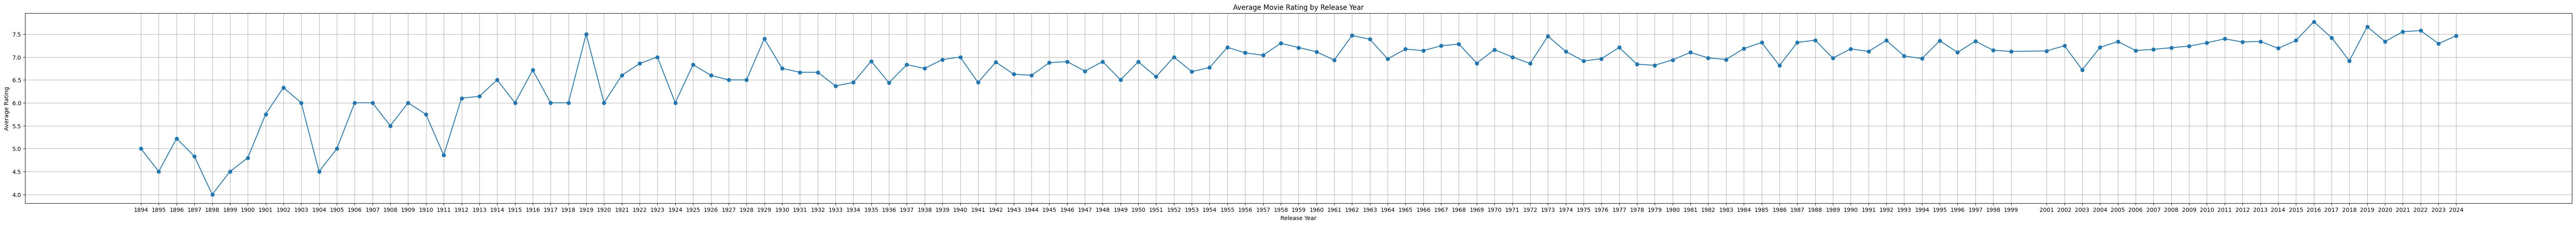

In [9]:
# Plot average rating on year of release.
df_avg_rating_by_year = df.groupby('startYear')['rating'].mean().reset_index()
df_avg_rating_by_year.columns = ['releaseYear', 'averageRating']
plt.figure(figsize=(80, 6))
plt.plot(df_avg_rating_by_year['releaseYear'], df_avg_rating_by_year['averageRating'], marker='o')
plt.title('Average Movie Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(df_avg_rating_by_year['releaseYear'])  # Show all years on x-axis
plt.grid()
plt.show()
del df_avg_rating_by_year

In [10]:
""" TODO
# Plot number of rating on year of release.
df_num_rating_by_year = df.groupby('startYear')['rating'].sum()
df_num_rating_by_year.columns = ['releaseYear', 'averageRating']
plt.figure(figsize=(80, 6))
plt.plot(df_avg_rating_by_year['releaseYear'], df_avg_rating_by_year['averageRating'], marker='o')
plt.title('Average Movie Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(df_avg_rating_by_year['releaseYear'])  # Show all years on x-axis
plt.grid()
plt.show()
del df_avg_rating_by_year
"""

" TODO\n# Plot number of rating on year of release.\ndf_num_rating_by_year = df.groupby('startYear')['rating'].sum()\ndf_num_rating_by_year.columns = ['releaseYear', 'averageRating']\nplt.figure(figsize=(80, 6))\nplt.plot(df_avg_rating_by_year['releaseYear'], df_avg_rating_by_year['averageRating'], marker='o')\nplt.title('Average Movie Rating by Release Year')\nplt.xlabel('Release Year')\nplt.ylabel('Average Rating')\nplt.xticks(df_avg_rating_by_year['releaseYear'])  # Show all years on x-axis\nplt.grid()\nplt.show()\ndel df_avg_rating_by_year\n"

In [11]:
# (7) Drop rows having numVotes and ratingCount bot equal to zero (for (6))
print('pre:', len(df))
df = df[ ~( (df['numVotes'] == 0) & (df['ratingCount'] == 0) ) ]
print('post', len(df))


pre: 5478
post 5478


In [12]:
#(3) Correlation between numVotes and ratingCount
count_correlt = df[['originalTitle', 'numVotes', 'ratingCount']]

# Suppress warning
pd.options.mode.chained_assignment = None  # default='warn'

count_correlt['difference'] = count_correlt['numVotes'] - count_correlt['ratingCount']
count_correlt['difference'] = count_correlt['difference'].apply(abs)

# Enable warning
pd.options.mode.chained_assignment = 'warn'

print('Mean of the difference:', count_correlt['difference'].mean())
print('Max difference:', count_correlt['difference'].max())

Mean of the difference: 0.7562979189485214
Max difference: 318


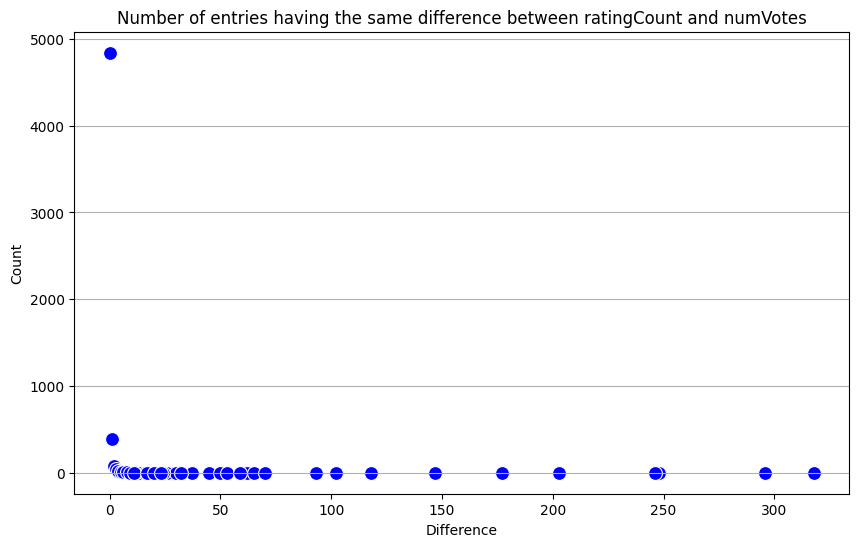

In [13]:
# (4) Plot of distribution of number of entries with same difference between numVotes and ratingCount
count_same_count = count_correlt[['difference']].groupby('difference').sum()
count_same_count = count_correlt['difference'].value_counts().reset_index()
# Plotting with Seaborn as points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=count_same_count, x='difference', y='count', color='blue', s=100)
plt.title('Number of entries having the same difference between ratingCount and numVotes')
plt.xlabel('Difference')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()
count_same_count
del count_same_count

In [14]:
# (5) How many entries have a difference between numVotes and ratingCount higher than 10?
temp = count_correlt[ count_correlt['difference'] >= 10 ]
temp.to_excel( pjoin(OUT_PATH, 'high_difference_numVotes_ratingCount.xlsx') )
print('Number of entries with a difference higher (or equal) than 10:', len(temp))
del temp

Number of entries with a difference higher (or equal) than 10: 52


In [16]:
corr = df.corr(method='pearson', min_periods=1, numeric_only=True)
corr

,rating,startYear,awardWins,numVotes,worstRating,bestRating,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount
rating,1.000000,0.181820,0.053364,0.029457,NaN,NaN,0.016680,-0.003634,0.040860,-0.023564,0.036216,0.074682,NaN,-0.049502,-0.100707,0.007322,0.029463
startYear,0.181820,1.000000,0.059633,0.011475,NaN,NaN,0.014017,0.075022,0.124219,0.016702,0.061380,0.120708,NaN,0.016047,-0.091428,0.013502,0.011488
awardWins,0.053364,0.059633,1.000000,0.248979,NaN,NaN,0.165485,0.356893,0.190773,0.377544,0.716455,0.022398,NaN,-0.016887,0.241053,0.367960,0.249022
numVotes,0.029457,0.011475,0.248979,1.000000,NaN,NaN,0.183977,0.350458,0.252377,0.702509,0.341042,-0.010687,NaN,-0.010375,0.421203,0.877057,1.000000
worstRating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bestRating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totalImages,0.016680,0.014017,0.165485,0.183977,NaN,NaN,1.000000,0.226571,0.284678,0.265571,0.209468,0.109679,NaN,-0.029343,0.318441,0.251220,0.183994
totalVideos,-0.003634,0.075022,0.356893,0.350458,NaN,NaN,0.226571,1.000000,0.392238,0.493433,0.417430,0.063056,NaN,-0.018059,0.385993,0.465596,0.350483
totalCredits,0.040860,0.124219,0.190773,0.252377,NaN,NaN,0.284678,0.392238,1.000000,0.339108,0.384250,0.209199,NaN,-0.060440,0.396696,0.325948,0.252401
criticReviewsTotal,-0.023564,0.016702,0.377544,0.702509,NaN,NaN,0.265571,0.493433,0.339108,1.000000,0.438355,-0.038576,NaN,-0.017734,0.637375,0.769506,0.702550


In [ ]:
# (6) Magnitude of difference between numVotes and ratingCount (requires (7))
count_correlt_mag = count_correlt

pd.options.mode.chained_assignment = None  # default='warn'

# REQUIRES numVotes or ratingCount non zero
count_correlt_mag['mean'] = (count_correlt['numVotes'] + count_correlt['ratingCount'])/2
count_correlt_mag['differenceMagnitude'] = count_correlt_mag['difference']/count_correlt_mag['mean'] 

# Enable warning
pd.options.mode.chained_assignment = 'warn'

print('max magnitude: ', count_correlt_mag['differenceMagnitude'].max())



max magnitude:  0.15384615384615385


In [ ]:
# (8) Merge numVotes and ratingCount
df['numRating'] = (df['numVotes'] + df['ratingCount']) / 2
df['numRating'] = df['numRating'].apply(lambda x : int(x))
df = df.drop(['numVotes', 'ratingCount'], axis='columns')
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,worstRating,bestRating,totalImages,totalVideos,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,countryOfOrigin,genres,numRating
0,Geologist of Animal Collective Performs Live a...,10,2015,\N,21,0.0,1,10,7,2,...,video,0,False,True,0,1,0,['US'],"Music,Short",15
2,Shan gou 1999,5,1999,\N,\N,0.0,1,10,10,0,...,movie,0,False,True,0,4,8,['HK'],Horror,304
3,The Craftsman: Preserving the Last Higgins Boat,9,2023,\N,\N,0.0,1,10,2,0,...,tvSpecial,0,False,True,0,1,0,['US'],Reality-TV,10
4,Week 3: Tuesday,7,2020,\N,\N,0.0,1,10,0,0,...,tvEpisode,0,False,True,0,1,0,['GB'],Game-Show,11
5,Traumhaus,6,1999,\N,90,NaN,1,10,2,0,...,tvEpisode,0,False,True,0,1,0,['DE'],"Crime,Drama,Mystery",145
